In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

from sklearn.impute import SimpleImputer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
def train(X_train, y_train):
    return

In [3]:
def predict(X_train, y_train, x_test, k):
    
    distances = []
    targets = []

    for i in range(len(X_train)):
       
        distances.append([np.sqrt(np.sum(np.square(x_test - X_train[i, :]))), i])

    
    distances = sorted(distances)


    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    
    return Counter(targets).most_common(1)[0][0]

In [4]:
def k_nearest_neighbor(X_train, y_train, X_test, k):
   
    train(X_train, y_train)


    predictions = []
    for i in range(len(X_test)):
        predictions.append(predict(X_train, y_train, X_test[i, :], k))

    return np.asarray(predictions)

In [5]:
import pandas as pd
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',sep=',')
iris_data.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','class']

In [6]:
iris_data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

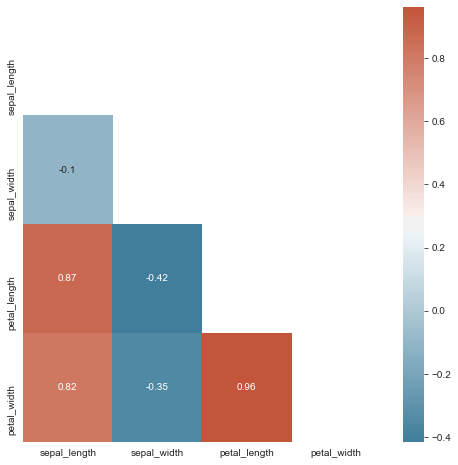

In [7]:
corr = iris_data.corr()
f, ax = plt.subplots(figsize=(8,8))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [8]:
X = np.array(iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])  
y = np.array(iris_data['class'])    
X_train, \
X_test, \
y_train, \
y_test = train_test_split(X, y, test_size=0.33, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
predictions = k_nearest_neighbor(X_train, y_train, X_test, 3)
accuracy = accuracy_score(y_test, predictions)
print("The accuracy of our classifier is {}".format(100*accuracy))

The accuracy of our classifier is 90.0
